In [77]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [95]:
signals = pd.read_csv("data/train/wind-farm-1-signals-training.csv", sep=";")
signals = signals[["Turbine_ID", "Timestamp", "Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg", "Rtr_RPM_Avg", "Gear_Bear_Temp_Avg", "Gen_RPM_Avg", "Gen_Bear2_Temp_Avg", "Gen_Bear_Temp_Avg"]]
signals["Timestamp_Datetime"] = pd.to_datetime(signals.Timestamp)
signals.Timestamp_Datetime = signals.Timestamp_Datetime.apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second))
signals_T01 = signals.loc[signals.Turbine_ID == "T01"]
signals_T06 = signals.loc[signals.Turbine_ID == "T06"]
signals_T07 = signals.loc[signals.Turbine_ID == "T07"]
signals_T09 = signals.loc[signals.Turbine_ID == "T09"]
signals_T11 = signals.loc[signals.Turbine_ID == "T11"]

In [92]:
failures = pd.read_csv("data/train/wind-farm-1-failures-training.csv", sep=';')
failures.Timestamp = pd.to_datetime(failures.Timestamp)
failures.Timestamp = failures.Timestamp.apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, 10 * math.floor(dt.minute / 10), dt.second))


TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

### Wykresy mocy i inne takie

Text(0.5, 1.0, 'Power curve for Turbine T01')

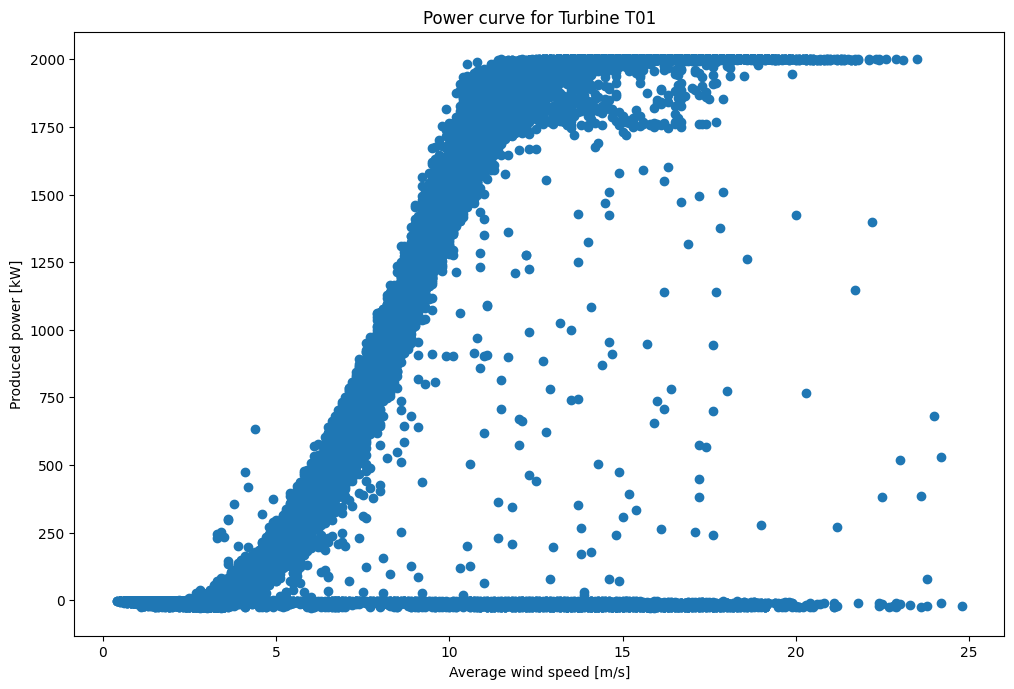

In [3]:
plt.scatter(signals_T01.Amb_WindSpeed_Avg, signals_T01.Grd_Prod_Pwr_Avg)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T01")

Text(0.5, 1.0, 'Power curve for Turbine T06')

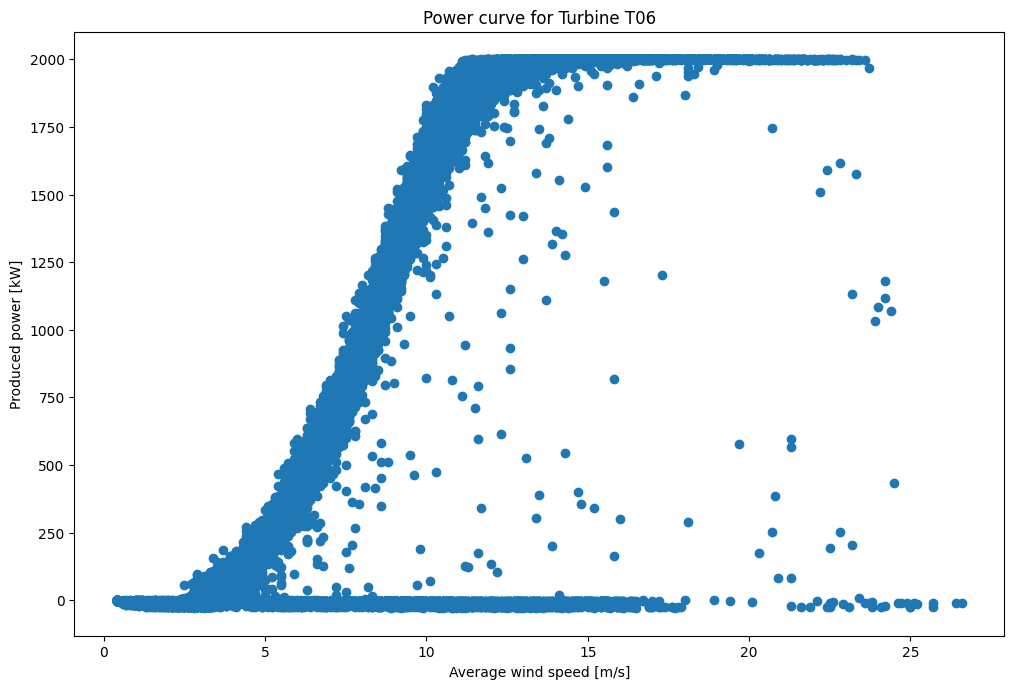

In [4]:
plt.scatter(signals_T06.Amb_WindSpeed_Avg, signals_T06.Grd_Prod_Pwr_Avg)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T06")

Text(0.5, 1.0, 'Power curve for Turbine T07')

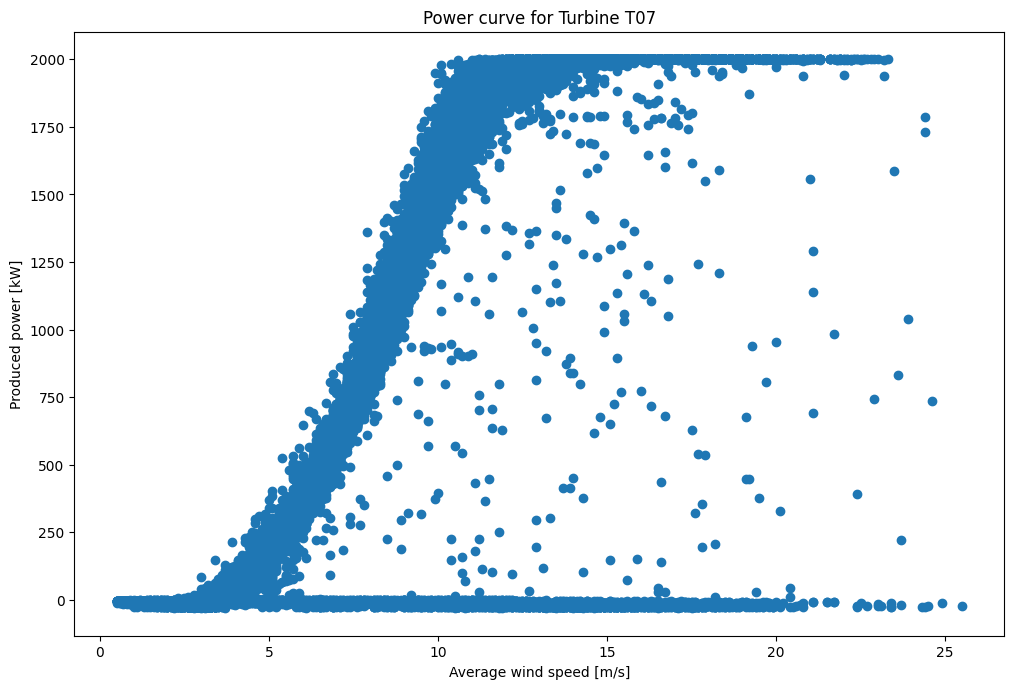

In [40]:
plt.scatter(signals_T07.Amb_WindSpeed_Avg, signals_T07.Grd_Prod_Pwr_Avg)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T07")

Text(0.5, 1.0, 'Power curve for Turbine T09')

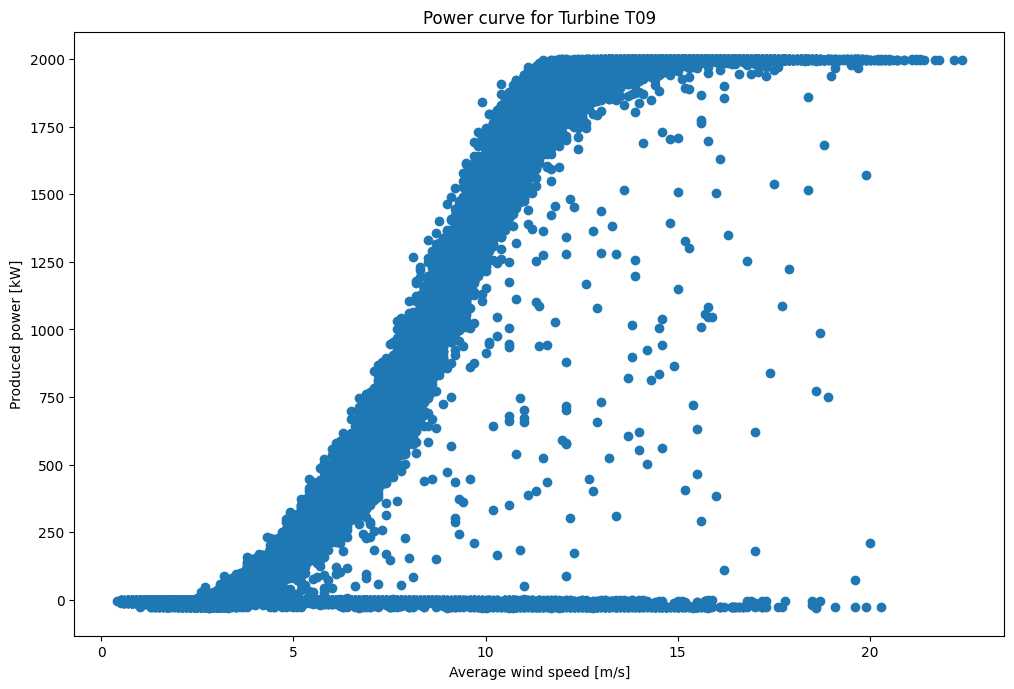

In [41]:
plt.scatter(signals_T09.Amb_WindSpeed_Avg, signals_T09.Grd_Prod_Pwr_Avg)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T09")

Text(0.5, 1.0, 'Power curve for Turbine T11')

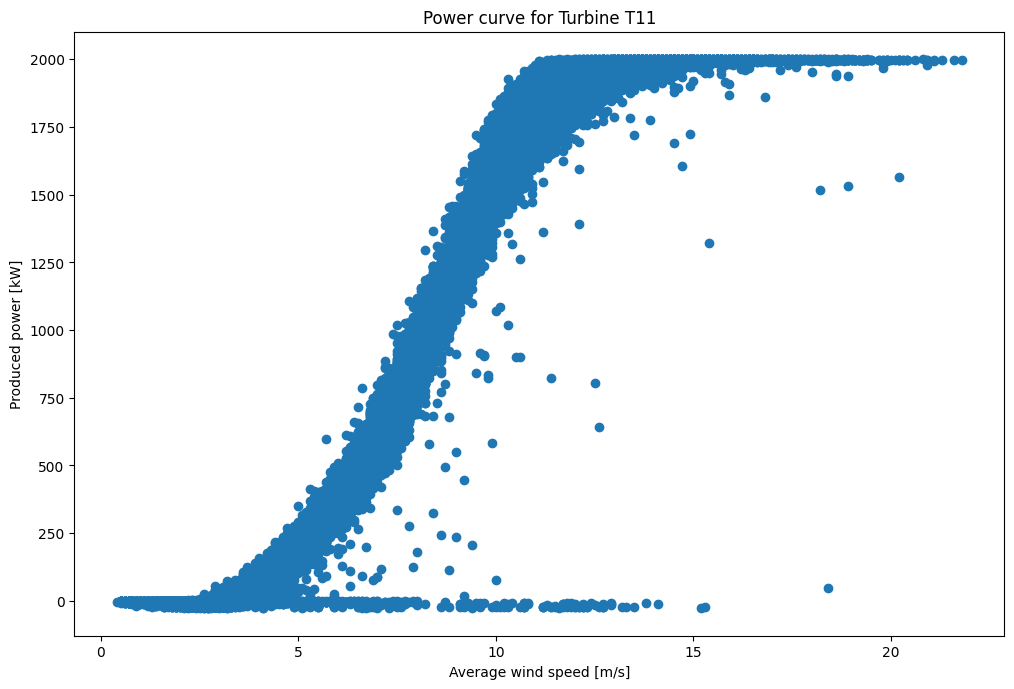

In [42]:
plt.scatter(signals_T11.Amb_WindSpeed_Avg, signals_T11.Grd_Prod_Pwr_Avg)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T11")

In [5]:
def sigmoid_curve(x, L, x_0, k, b):
    return L / (1 + np.exp(-k * (x - x_0))) + b

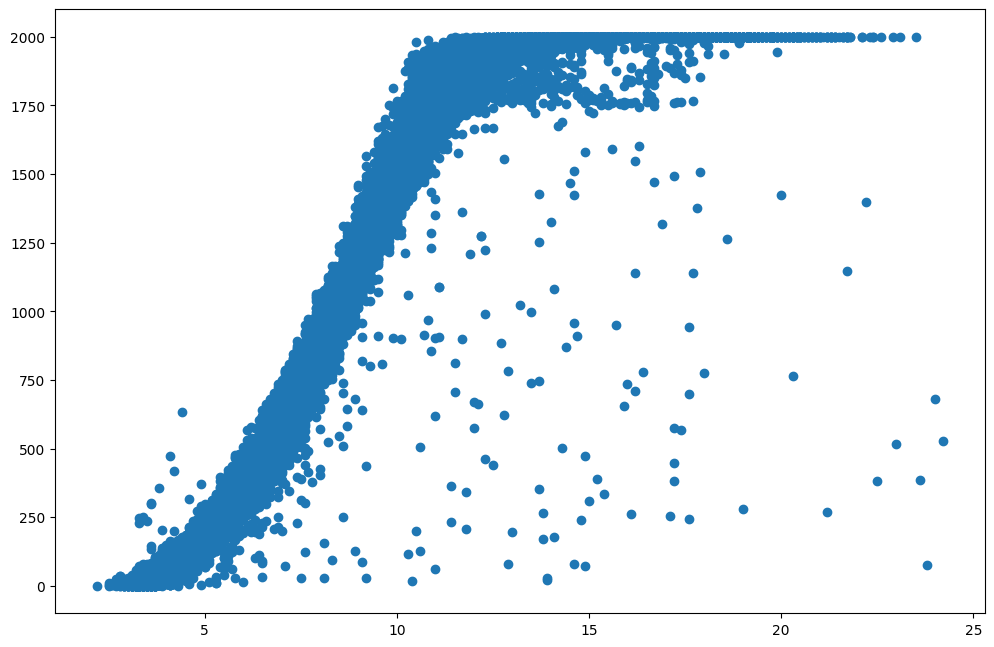

In [10]:
x_data = signals_T01.loc[signals_T01.Grd_Prod_Pwr_Avg >= 0, "Amb_WindSpeed_Avg"]
y_data = signals_T01.loc[signals_T01.Grd_Prod_Pwr_Avg >= 0, "Grd_Prod_Pwr_Avg"]

In [11]:
init_state = [max(y_data), np.median(x_data), 1, min(y_data)]
popt, pcov = curve_fit(sigmoid_curve, x_data, y_data, method="dogbox")

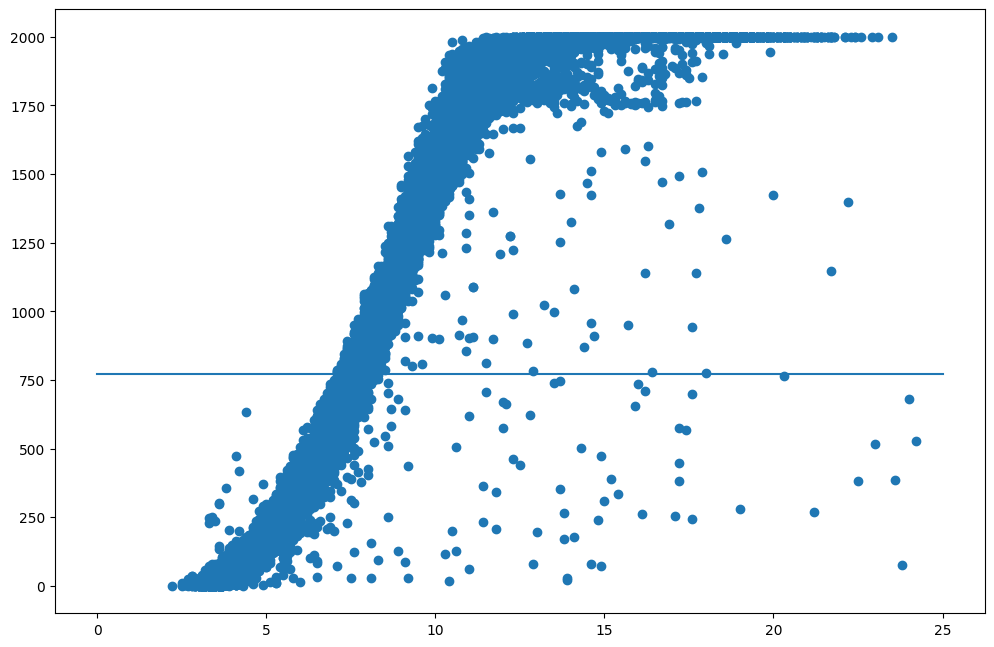

In [14]:
plt.scatter(x_data, y_data)
x = np.linspace(0, 25, 1000)
y = sigmoid_curve(x, *popt)
plt.plot(x, y)

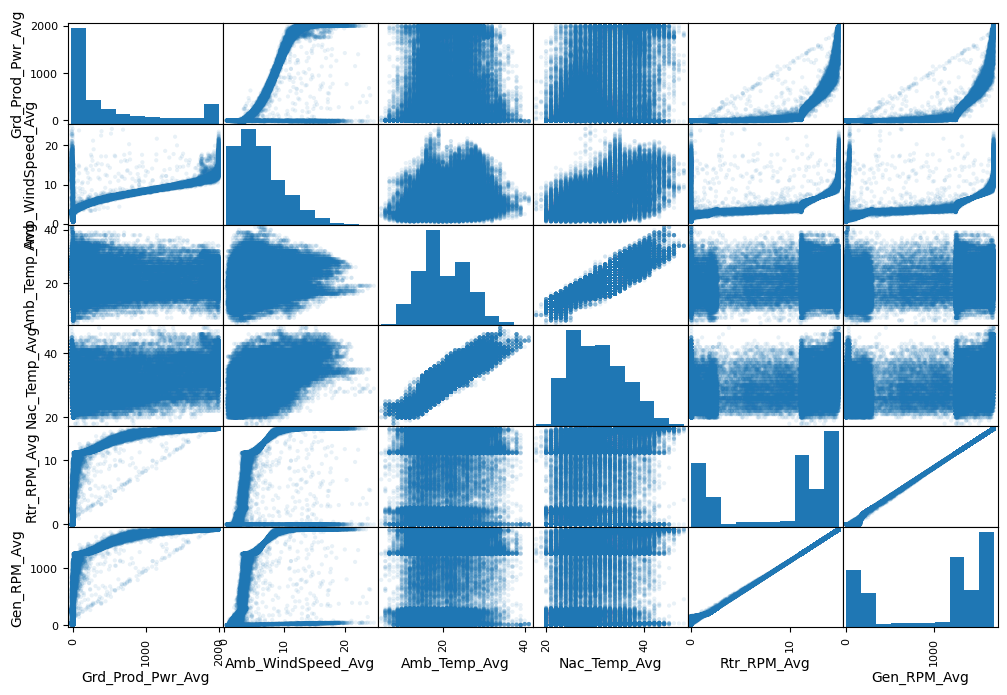

In [24]:
attributes = ["Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg", "Rtr_RPM_Avg", "Gen_RPM_Avg"]
pd.plotting.scatter_matrix(signals_T01[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

### Analiza zachowania krzywej mocy podczas awarii

In [98]:
failures

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03 19:00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04 18:50:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07 16:50:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10 03:40:00,High temperature transformer
5,T06,GENERATOR,2016-07-11 19:40:00,Generator replaced
6,T01,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
7,T06,GENERATOR,2016-07-24 17:00:00,Generator temperature sensor failure
8,T09,GENERATOR_BEARING,2016-08-22 18:20:00,High temperature generator bearing
9,T07,TRANSFORMER,2016-08-23 02:20:00,High temperature transformer. Transformer refr...


W przypadku pierwszej awarii turbiny jedenastej nie ma danych z tej konkretnej godziny...

In [103]:
signals_T11.loc[signals_T11.Timestamp_Datetime >= datetime.datetime(2016, 3, 3, 18, 30, 0), ]

,Turbine_ID,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Gear_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Gen_Bear_Temp_Avg,Timestamp_Datetime
45177,T11,2016-03-03T18:30:00+00:00,-2.6,2.9,14,24,0.0,30,0.0,26,26.0,2016-03-03 18:30:00
45180,T11,2016-03-03T18:40:00+00:00,-6.6,3.1,14,23,0.9,30,105.4,26,26.0,2016-03-03 18:40:00
45183,T11,2016-03-03T18:50:00+00:00,-3.7,3.5,13,24,0.0,30,7.1,26,26.0,2016-03-03 18:50:00
45194,T11,2016-03-03T19:10:00+00:00,-5.4,2.4,13,24,0.4,32,79.9,28,26.0,2016-03-03 19:10:00
45198,T11,2016-03-03T19:20:00+00:00,-3.9,3.1,13,24,7.6,35,861.4,29,26.0,2016-03-03 19:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
434122,T11,2017-08-31T23:20:00+00:00,303.8,5.9,26,31,11.4,57,1286.1,42,43.0,2017-08-31 23:20:00
434126,T11,2017-08-31T23:30:00+00:00,149.6,5.0,26,31,11.1,56,1249.8,42,43.0,2017-08-31 23:30:00
434132,T11,2017-08-31T23:40:00+00:00,82.6,4.3,26,31,11.1,55,1248.8,43,44.0,2017-08-31 23:40:00
434135,T11,2017-08-31T23:50:00+00:00,130.6,4.8,26,31,11.1,55,1250.5,43,45.0,2017-08-31 23:50:00


In [97]:
signals.merge(failures, left_on=["Turbine_ID", "Timestamp_Datetime"], right_on=["Turbine_ID", "Timestamp"], how="inner")

,Turbine_ID,Timestamp_x,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Gear_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Gen_Bear_Temp_Avg,Timestamp_Datetime,Component,Timestamp_y,Remarks
0,T06,2016-04-04T18:50:00+00:00,-21.6,9.7,16,31,0.0,56,21.4,53,70.0,2016-04-04 18:50:00,HYDRAULIC_GROUP,2016-04-04 18:50:00,Error in pitch regulation
1,T07,2016-04-30T12:40:00+00:00,-3.8,2.1,22,33,0.0,35,2.9,32,204.0,2016-04-30 12:40:00,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
2,T09,2016-06-07T16:50:00+00:00,1879.3,12.2,29,42,14.8,70,1675.1,79,98.0,2016-06-07 16:50:00,GENERATOR_BEARING,2016-06-07 16:50:00,High tempemperature generator bearing
3,T07,2016-07-10T03:40:00+00:00,1999.9,13.3,26,40,14.9,65,1680.9,80,79.0,2016-07-10 03:40:00,TRANSFORMER,2016-07-10 03:40:00,High temperature transformer
4,T01,2016-07-18T02:10:00+00:00,441.6,12.5,24,32,3.6,58,417.1,45,41.0,2016-07-18 02:10:00,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
5,T06,2016-07-24T17:00:00+00:00,1999.4,14.8,29,44,14.9,66,1681.1,71,94.0,2016-07-24 17:00:00,GENERATOR,2016-07-24 17:00:00,Generator temperature sensor failure
6,T09,2016-08-22T18:20:00+00:00,1995.6,14.3,29,45,14.8,70,1681.8,75,98.0,2016-08-22 18:20:00,GENERATOR_BEARING,2016-08-22 18:20:00,High temperature generator bearing
7,T07,2016-08-23T02:20:00+00:00,1882.2,11.2,25,35,14.8,64,1672.4,75,64.0,2016-08-23 02:20:00,TRANSFORMER,2016-08-23 02:20:00,High temperature transformer. Transformer refr...
8,T06,2016-09-04T08:00:00+00:00,227.6,5.3,26,36,11.3,58,1272.1,53,56.0,2016-09-04 08:00:00,GENERATOR,2016-09-04 08:00:00,High temperature generator error
9,T06,2016-10-02T17:00:00+00:00,237.7,5.2,25,32,11.3,51,1279.4,44,47.0,2016-10-02 17:00:00,GENERATOR,2016-10-02 17:00:00,Refrigeration system and temperature sensors i...
